**Name:** Shreya Vinay Nayak

**Github Username:** ShreyaNayak256

**USC ID:** 8592810456

In [1]:
import pandas as pd
import numpy as np
import math
import operator
import random
import statistics
import urllib
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from tabulate import tabulate
from scipy.special import softmax
from beautifultable import BeautifulTable
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.cluster import KMeans,SpectralClustering
from scipy.cluster import hierarchy
from sklearn.metrics import hamming_loss, silhouette_score, accuracy_score
from matplotlib import rcParams
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,f1_score,log_loss,roc_curve,recall_score,precision_recall_curve,precision_score, classification_report,roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier,plot_tree
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning
warnings.filterwarnings('ignore',category=DataConversionWarning)
warnings.filterwarnings('ignore',category=ConvergenceWarning)
import statsmodels.api as sm
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from statistics import mean,stdev
from imblearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 1. Supervised, Semi-Supervised, and Unsupervised Learning


**(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.**

In [3]:
columnNames = ['ID_no',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal-dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal-dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal-dimension_worst']

df = pd.read_csv('../data/wdbc.csv', names=columnNames)
df.head()

,ID_no,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal-dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_no                    569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal-dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.**

In [5]:
def split_data(data):
    cols = list(data.columns)
    cols.remove('diagnosis')
    m_data = data[data['diagnosis']=='M']
    b_data = data[data['diagnosis']=='B']
    
    m_X_train,m_X_test,m_y_train,m_y_test = train_test_split(m_data[cols],m_data['diagnosis'], test_size=0.2)
    b_X_train,b_X_test,b_y_train,b_y_test = train_test_split(b_data[cols],b_data['diagnosis'], test_size=0.2)
    
    X_train = pd.concat([m_X_train,b_X_train])
    X_test = pd.concat([m_X_test,b_X_test])
    y_train = pd.concat([m_y_train,b_y_train])
    y_test = pd.concat([m_y_test,b_y_test])
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    y_train = pd.DataFrame(y_train, columns = ['diagnosis'])
    y_test = pd.DataFrame(y_test, columns = ['diagnosis'])
    
    return (X_train,X_test,y_train,y_test)

In [6]:
def printTable(cols_table, data_of_table):
    table = BeautifulTable(max_width=100)
    table.set_style(BeautifulTable.STYLE_SEPARATED)
    if len(cols_table)!=0:
        table.column_headers = cols_table
    for i in range(0, len(data_of_table)):
        table.append_row(data_of_table[i])
    print(table)

In [7]:
X_train,X_test,y_train,y_test = split_data(df)
# the number of Malignant and Benign classes in both test and train dataset
print('Number of Benign and Malignant instancesin train dataset:')
print(y_train['diagnosis'].value_counts(),'\n')
print('Number of Benign and Malignant instances in test dataset:')
print(y_test['diagnosis'].value_counts())

Number of Benign and Malignant instancesin train dataset:
B    285
M    169
Name: diagnosis, dtype: int64 

Number of Benign and Malignant instances in test dataset:
B    72
M    43
Name: diagnosis, dtype: int64


In [8]:
def normalize_data(data):
    norm = Normalizer()
    return norm.fit_transform(data)

In [9]:
def ROC_AUC_CM(true_y, predicted_y, prob_y, title):
    cm = confusion_matrix(true_y, predicted_y)
    print("The confusion matrix for {} set is \n{}".format(title, cm))
    fprate, tprate, thresholds = roc_curve(true_y, prob_y, pos_label='M')
    auc_curve = round(auc(fprate, tprate),)
    fig, axes = plt.subplots(figsize=(17, 10))
    axes.plot(fprate, tprate, label='ROC curve (area =%0.5f)' % auc_curve)
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    axes.set_title("ROC curves of {} set".format(title))
    plt.show()

In [10]:
def learning_supervised(data, n):
    train_results = {'accuracy':[], 'precision':[], 'recall':[], 'f1-score':[], 'auc':[]}
    test_results = {'accuracy':[], 'precision':[], 'recall':[], 'f1-score':[], 'auc':[]}

    for i in range(1,n+1):
        parameters = {'classifier__C': np.logspace(-2, 8, num=11)}
        kfold_cv = StratifiedKFold(5, random_state=1, shuffle=True)
        pipeline = Pipeline([('scaler', MinMaxScaler()),
                            ('classifier', LinearSVC(penalty='l1', dual=False))])
        grid_cv = GridSearchCV(pipeline, param_grid = parameters,
                               cv=kfold_cv, scoring='f1_weighted')

        # Splitting the data inside the for loop to get different train and test data for each iteration
        X_train, X_test, y_train, y_test = split_data(data)

        # Normalizing the train and test data obtained 
        normalized_X_train = normalize_data(X_train)
        normalized_X_test = normalize_data(X_test)
        grid_cv.fit(normalized_X_train, y_train)

        #For training
        print('Attempt {}:'.format(i))
        y_train_probability = grid_cv.decision_function(normalized_X_train)
        y_train_prediction = grid_cv.predict(normalized_X_train)
        report_for_training = classification_report(y_train, y_train_prediction, output_dict=True)
        false_positive_rate, true_positive_rate, constraints = roc_curve(y_train, y_train_probability, pos_label='M')
        auc_tr = auc(false_positive_rate, true_positive_rate)
        train_results['accuracy'].append(report_for_training['accuracy'])
        train_results['precision'].append(report_for_training['weighted avg']['precision'])
        train_results['recall'].append(report_for_training['weighted avg']['recall'])
        train_results['f1-score'].append(report_for_training['weighted avg']['f1-score'])
        train_results['auc'].append(auc_tr)

        #For testing
        y_test_probability = grid_cv.decision_function(normalized_X_test)
        y_test_prediction = grid_cv.predict(normalized_X_test)
        report_for_testing = classification_report(y_test, y_test_prediction, output_dict=True)
        false_positive_rate, true_positive_rate, constraints = roc_curve(y_test, y_test_probability, pos_label='M')
        area_under_curve_ts = auc(false_positive_rate, true_positive_rate)
        test_results['accuracy'].append(report_for_testing['accuracy'])
        test_results['precision'].append(report_for_testing['weighted avg']['precision'])
        test_results['recall'].append(report_for_testing['weighted avg']['recall'])
        test_results['f1-score'].append(report_for_testing['weighted avg']['f1-score'])
        test_results['auc'].append(area_under_curve_ts)

        print('Train Accuracy:',report_for_training['accuracy'],'Test Accuracy:',report_for_testing['accuracy'],'\n')

        if i==1:
            print('ROC and Confusion matrix from 1st attempt:\n')
            ROC_AUC_CM(y_train, y_train_prediction, y_train_probability, 'Training ROC')
            ROC_AUC_CM(y_test, y_test_prediction, y_test_probability, 'Test ROC')


    def average_measures(lst):
        return sum(lst) / len(lst)
    print('Average Measurements for training set:')
    print('Accuracy:', average_measures(train_results['accuracy']), 'Precision:', average_measures(train_results['precision']) ,
          'Recall:', average_measures(train_results['recall']), 'F1-score:', average_measures(train_results['f1-score']),
          'AUC:', average_measures(train_results['auc']))
    print('\n')

    print('Average Measurements for test set:')
    print('Accuracy:', average_measures(test_results['accuracy']), 'Precision:', average_measures(test_results['precision']) ,
          'Recall:', average_measures(test_results['recall']), 'F1-score:', average_measures(test_results['f1-score']),
          'AUC:', average_measures(test_results['auc']))
    return (train_results,test_results)

**i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.**

Attempt 1:
Train Accuracy: 0.9273127753303965 Test Accuracy: 0.8956521739130435 

ROC and Confusion matrix from 1st attempt:

The confusion matrix for Training ROC set is 
[[282   3]
 [ 30 139]]


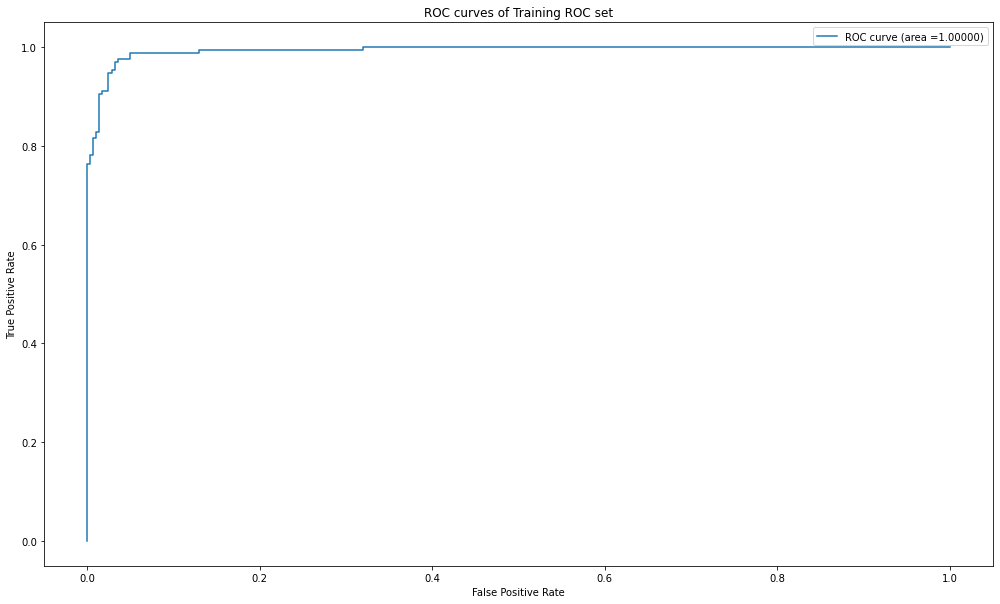

The confusion matrix for Test ROC set is 
[[69  3]
 [ 9 34]]


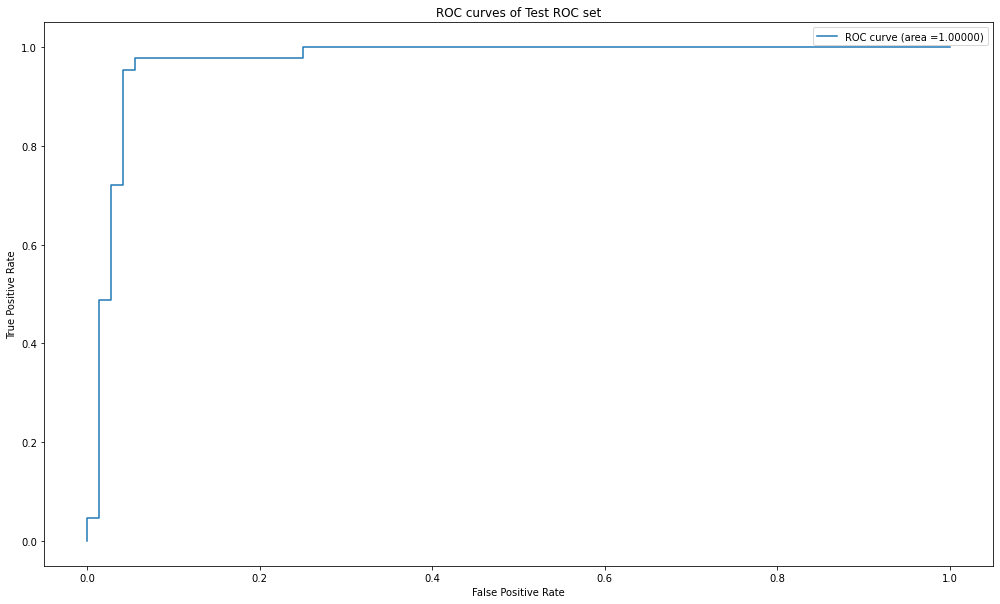

Attempt 2:
Train Accuracy: 0.9096916299559471 Test Accuracy: 0.8173913043478261 

Attempt 3:
Train Accuracy: 0.9295154185022027 Test Accuracy: 0.8782608695652174 

Attempt 4:
Train Accuracy: 0.9140969162995595 Test Accuracy: 0.9043478260869565 

Attempt 5:
Train Accuracy: 0.933920704845815 Test Accuracy: 0.8956521739130435 

Attempt 6:
Train Accuracy: 0.920704845814978 Test Accuracy: 0.9043478260869565 

Attempt 7:
Train Accuracy: 0.920704845814978 Test Accuracy: 0.8956521739130435 

Attempt 8:
Train Accuracy: 0.9074889867841409 Test Accuracy: 0.9304347826086956 

Attempt 9:
Train Accuracy: 0.9074889867841409 Test Accuracy: 0.8782608695652174 

Attempt 10:
Train Accuracy: 0.8942731277533039 Test Accuracy: 0.9304347826086956 

Attempt 11:
Train Accuracy: 0.9383259911894273 Test Accuracy: 0.8608695652173913 

Attempt 12:
Train Accuracy: 0.9052863436123348 Test Accuracy: 0.9043478260869565 

Attempt 13:
Train Accuracy: 0.9118942731277533 Test Accuracy: 0.8608695652173913 

Attempt 14:
Tra

In [11]:
train_results,test_results = learning_supervised(df,30)

**ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.**

**A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.**

**B. Findtheunlabeleddatapointthatisthefarthesttothedecisionboundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.**

In [12]:
def self_training(X_train, y_train):
    list_of_labeled= []
    
    B_class, = np.where(y_train['diagnosis'] == 'B')
    num_in_B = round(len(B_class) * (1/2))
    select_B = np.random.choice(B_class, num_in_B, replace=False)
    list_of_labeled.extend(select_B)
    M_class, = np.where(y_train['diagnosis'] == 'M')
    num_in_M = round(len(M_class) * (1/2))
    select_M = np.random.choice(M_class, num_in_M, replace=False)
    list_of_labeled.extend(select_M)
    list_of_unlabeled = [i for i in range(len(X_train)) if i not in list_of_labeled]
    
    X_labeled_data = X_train[list_of_labeled].tolist()
    y_labeled_data = y_train.iloc[list_of_labeled]
    y_labeled_data = y_labeled_data['diagnosis'].to_list()
    
    X_unlabeled_data = X_train[list_of_unlabeled].tolist()
    y_unlabeled_data = y_train.iloc[list_of_unlabeled]
    y_unlabeled_data = y_unlabeled_data['diagnosis'].to_list()
    
    parameters = {'classifier__C': np.logspace(-2, 8, num=11)}
    kfold_cv = StratifiedKFold(5, random_state=1, shuffle=True)
    pipeline = Pipeline([('scaler', MinMaxScaler()),
                        ('classifier', LinearSVC(penalty='l1', dual=False))])
    grid_cv = GridSearchCV(pipeline, param_grid = parameters,
                           cv=kfold_cv, scoring='f1_weighted')
    grid_cv.fit(X_labeled_data, y_labeled_data)
    
    while len(X_unlabeled_data) > 0:
        # calculating distance 
        distance = grid_cv.decision_function(X_unlabeled_data)
        # sorting the distances
        sorted_indices = sorted([i for i in range(len(X_unlabeled_data))], 
                            key=lambda x : abs(distance[x]))
    
        X_unlabeled_data = [X_unlabeled_data[i] for i in sorted_indices]
        y_unlabeled_data = [y_unlabeled_data[i] for i in sorted_indices]

        X_labeled_data.append(X_unlabeled_data.pop())
        y_labeled_data.append(y_unlabeled_data.pop())
        
        grid_cv.best_estimator_.fit(X_labeled_data, y_labeled_data)
    
    return grid_cv

In [13]:
def self_training_measures(dataset, n):
    measurements = ['accuracy', 'precision', 'recall', 'f1-score', 'auc']
    train_dictionary_measures = {}
    test_dictionary_measures = {}
    for i in measurements:
        train_dictionary_measures[i]=[]
        test_dictionary_measures[i]=[]

    for i in range(1,n+1):

        # Splitting the data inside the for loop to get different train and test data for each iteration
        X_train, X_test, y_train, y_test = split_data(dataset)

        # Normalizing the train and test data obtained from above
        scaler = Normalizer()
        normalised_X_train = scaler.fit_transform(X_train)
        normalised_X_test = scaler.transform(X_test)

        grid_cv = self_training(normalised_X_train, y_train)

        #for train
        print('Attempt {}:'.format(i))
        y_train_probability = grid_cv.decision_function(normalised_X_train)
        y_train_prediction = grid_cv.predict(normalised_X_train)
        train_report = classification_report(y_train, y_train_prediction, output_dict=True)
        fpr, tpr, thresholds = roc_curve(y_train, y_train_probability, pos_label='M')
        area_under_curve_tr = auc(fpr, tpr)
        train_dictionary_measures['accuracy'].append(train_report['accuracy'])
        train_dictionary_measures['precision'].append(train_report['weighted avg']['precision'])
        train_dictionary_measures['recall'].append(train_report['weighted avg']['recall'])
        train_dictionary_measures['f1-score'].append(train_report['weighted avg']['f1-score'])
        train_dictionary_measures['auc'].append(area_under_curve_tr)

        #for test
        y_test_probability = grid_cv.decision_function(normalised_X_test)
        y_test_prediction = grid_cv.predict(normalised_X_test)
        test_report = classification_report(y_test, y_test_prediction, output_dict=True)
        fpr, tpr, thresholds = roc_curve(y_test, y_test_probability, pos_label='M')
        area_under_curve_ts = auc(fpr, tpr)
        test_dictionary_measures['accuracy'].append(test_report['accuracy'])
        test_dictionary_measures['precision'].append(test_report['weighted avg']['precision'])
        test_dictionary_measures['recall'].append(test_report['weighted avg']['recall'])
        test_dictionary_measures['f1-score'].append(test_report['weighted avg']['f1-score'])
        test_dictionary_measures['auc'].append(area_under_curve_ts)

        print('Train Accuracy:',train_report['accuracy'],'Test Accuracy:',test_report['accuracy'],'\n')

        if i==1:
            print('ROC and Confusion matrix from 1st attempt:\n')
            ROC_AUC_CM(y_train, y_train_prediction, y_train_probability, 'Training ROC')
            ROC_AUC_CM(y_test, y_test_prediction, y_test_probability, 'Test ROC')


    def Average(lst):
        return sum(lst) / len(lst)
    print('Average Measurements for training set:')
    print('Accuracy:', Average(train_dictionary_measures['accuracy']), 'Precision:', Average(train_dictionary_measures['precision']) ,
          'Recall:', Average(train_dictionary_measures['recall']), 'F1-score:', Average(train_dictionary_measures['f1-score']),
          'AUC:', Average(train_dictionary_measures['auc']))
    print('\n')

    print('Average Measurements for test set:')
    print('Accuracy:', Average(test_dictionary_measures['accuracy']), 'Precision:', Average(test_dictionary_measures['precision']) ,
          'Recall:', Average(test_dictionary_measures['recall']), 'F1-score:', Average(test_dictionary_measures['f1-score']),
          'AUC:', Average(test_dictionary_measures['auc']))
    
    return (train_dictionary_measures,test_dictionary_measures)

Attempt 1:
Train Accuracy: 0.9295154185022027 Test Accuracy: 0.9739130434782609 

ROC and Confusion matrix from 1st attempt:

The confusion matrix for Training ROC set is 
[[281   4]
 [ 28 141]]


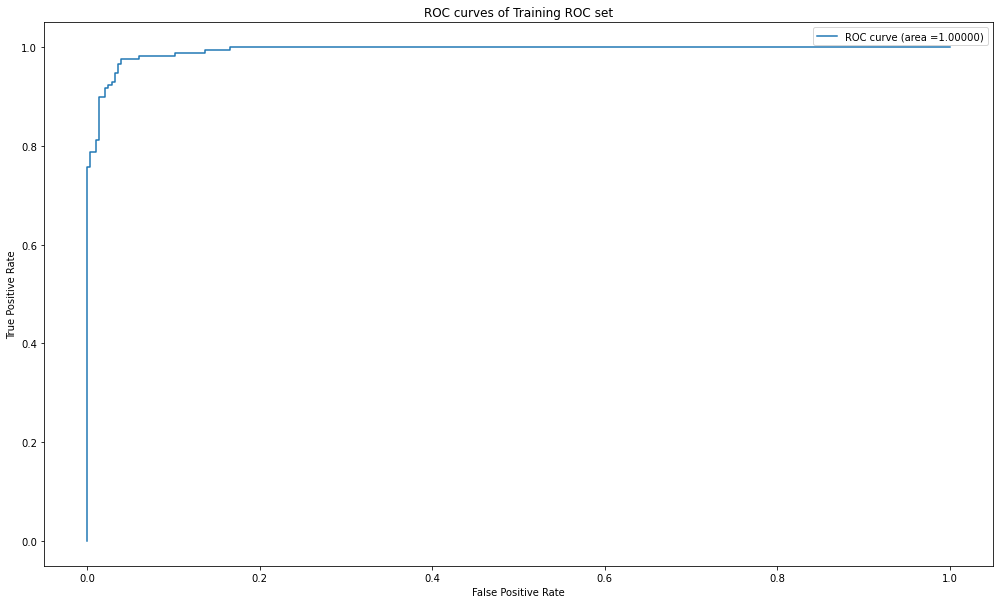

The confusion matrix for Test ROC set is 
[[70  2]
 [ 1 42]]


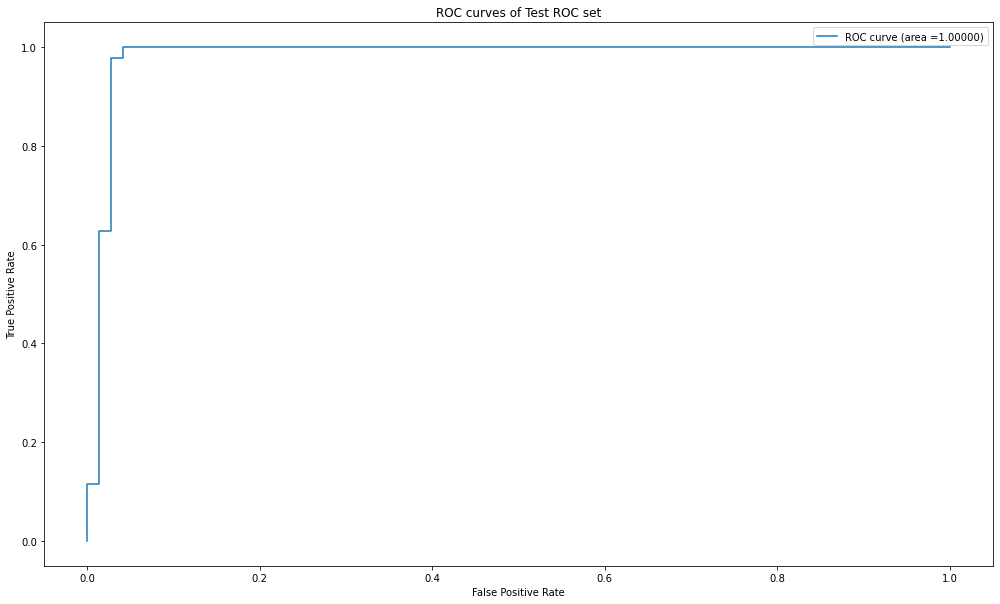

Attempt 2:
Train Accuracy: 0.9317180616740088 Test Accuracy: 0.9130434782608695 

Attempt 3:
Train Accuracy: 0.9185022026431718 Test Accuracy: 0.9130434782608695 

Attempt 4:
Train Accuracy: 0.9427312775330396 Test Accuracy: 0.9304347826086956 

Attempt 5:
Train Accuracy: 0.9185022026431718 Test Accuracy: 0.9130434782608695 

Attempt 6:
Train Accuracy: 0.947136563876652 Test Accuracy: 0.8869565217391304 

Attempt 7:
Train Accuracy: 0.9361233480176211 Test Accuracy: 0.9043478260869565 

Attempt 8:
Train Accuracy: 0.920704845814978 Test Accuracy: 0.8782608695652174 

Attempt 9:
Train Accuracy: 0.9647577092511013 Test Accuracy: 0.9217391304347826 

Attempt 10:
Train Accuracy: 0.8986784140969163 Test Accuracy: 0.9217391304347826 

Attempt 11:
Train Accuracy: 0.9052863436123348 Test Accuracy: 0.8869565217391304 

Attempt 12:
Train Accuracy: 0.9030837004405287 Test Accuracy: 0.8956521739130435 

Attempt 13:
Train Accuracy: 0.8942731277533039 Test Accuracy: 0.9130434782608695 

Attempt 14:
Tr

In [14]:
train_dictionary_measures,test_dictionary_measures = self_training_measures(df, 30)

**iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.**

**A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?**

K-Means clustering algorithm finds an optimal solution that could be either local best solution or global best solution. To ensure that the algorithm does not get trapped in local minimum is to repeat the clustering algorithm multiple times and take the most optimal solution. In K-means algorithm, every different choice of initial cluster seeds may lead to different clusters because the algorithm tries to optimize the cost function. Therefore, it is better to take a stochastic approach and run the algorithm many times with different initial cluster seeds. This will lead to mulitple clustering results, so choose those clusters that give the lowest error.

Evaluation on Train Data:
Average Train Accuracy: 0.628
Average Train Precision: 0.628
Average Train Recall: 1.0
Average Train F-Score: 0.771
Average Train AUC: 0.568


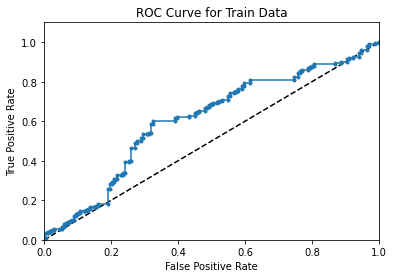

Train Data-Confusion Matrix:
----------------  ----------------  -------------------
                  Predicted Benign  Predicted Malignant
Actual Benign     285               0
Actual Malignant  169               0
----------------  ----------------  -------------------
TEST DATA EVALUATION:
Average Test Accuracy: 0.019
Average Test Precision: 0.021
Average Test Recall: 0.033
Average Test F-Score: 0.026
Average Test AUC: 0.019


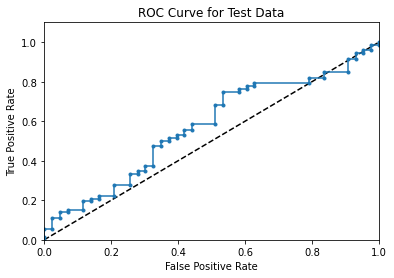

Confusion Matrix for Test Data:
----------------  ----------------  -------------------
                  Predicted Benign  Predicted Malignant
Actual Benign     72                0
Actual Malignant  43                0
----------------  ----------------  -------------------


In [15]:
N = 30
M_clustr_centro = {}
X_test_clustr = {}
M_clustr_labels = {}
avg_train_accu_clstr = 0.0
avg_train_precision_clstr = 0.0
avg_train_recall_clstr = 0.0
avg_train_fscore_clstr = 0.0
avg_train_auc_clstr = 0.0
avg_test_accu_clstr= 0.0
avg_test_precision_clstr = 0.0
avg_test_recall_clstr = 0.0
avg_test_fscore_clstr = 0.0
avg_test_auc_clstr = 0.0

for m in range(0, N):

    X_train, X_test, y_train, y_test = split_data(df)

    X_test_clustr[m] = X_test

    kMeansModel = KMeans(n_clusters=2, init='random')
    kMeansModel = kMeansModel.fit(X_train)

    centers_of_clusters = kMeansModel.cluster_centers_
    M_clustr_centro[m] =centers_of_clusters

    clusterSampleDistances = euclidean_distances(X_train,centers_of_clusters)

    Cluster1 = {}
    Cluster2 = {}
    for i in range(0, len(X_train)):
        Cluster1[i] = clusterSampleDistances[i][0]
        Cluster2[i] = clusterSampleDistances[i][1]
    sorted_Cluster1 = sorted(Cluster1.items(), key=operator.itemgetter(1))
    sorted_Cluster2 = sorted(Cluster2.items(), key=operator.itemgetter(1))

    Label1Cnt = {}
    for i in range(0, 30):
        sampleIdx = sorted_Cluster1[i][0]
        label = y_train['diagnosis'][sampleIdx]
        if label in Label1Cnt.keys():
            Label1Cnt[label] += 1
        else:
            Label1Cnt[label] = 1
    Label1CntSorted = sorted(Label1Cnt.items(), key=operator.itemgetter(1), reverse=True)
    Cluster1Label = Label1CntSorted[0][0]

    Label2Cnt = {}
    for i in range(0, 30):
        sampleIdx = sorted_Cluster2[i][0]
        label = y_train['diagnosis'][sampleIdx]
        if label in Label2Cnt.keys():
            Label2Cnt[label] += 1
        else:
            Label2Cnt[label] = 1
    Label2CntSorted = sorted(Label2Cnt.items(), key=operator.itemgetter(1), reverse=True)
    Cluster2Label = Label2CntSorted[0][0]

    clusterLabels = []
    clusterLabels.append(Cluster1Label)
    clusterLabels.append(Cluster2Label)
    M_clustr_labels[m] = clusterLabels

    train_true_pos_clstr = 0
    train_true_neg_clustr = 0
    train_false_pos_clustr= 0
    train_false_neg_clustr= 0
    for i in range(0, len(clusterSampleDistances)):
        Cluster1Dist = clusterSampleDistances[i][0]
        Cluster2Dist = clusterSampleDistances[i][1]
        if Cluster1Dist<Cluster2Dist:
            if y_train['diagnosis'][i]=='B':
                if Cluster1Label=='B':
                    train_true_pos_clstr= train_true_pos_clstr + 1
                else:
                    train_false_neg_clustr=train_false_neg_clustr+1
            else:
                if Cluster1Label=='M':
                    train_true_neg_clustr= train_true_neg_clustr + 1
                else:
                    train_false_pos_clustr=train_false_pos_clustr+1
        else:
            if y_train['diagnosis'][i]=='B':
                if Cluster2Label=='B':
                    train_true_pos_clstr=train_true_pos_clstr + 1
                else:
                    train_false_neg_clustr=train_false_neg_clustr+1
            else:
                if Cluster2Label=='M':
                    train_true_neg_clustr= train_true_neg_clustr +1
                else:
                    train_false_pos_clustr= train_false_pos_clustr+1

    clusterTrainAccuracy = round((train_true_pos_clstr+train_true_neg_clustr)/len(X_train),3)
    clusterTrainPrecision = round((train_true_pos_clstr)/(train_true_pos_clstr+train_false_pos_clustr),3)
    clusterTrainRecall = round((train_true_pos_clstr)/(train_true_pos_clstr+train_false_neg_clustr),3)
    clusterTrainFScore = round((2*clusterTrainPrecision*clusterTrainRecall)/(clusterTrainPrecision+clusterTrainRecall),3)
    clusterTrainActualClass  = np.array(y_train['diagnosis'])
    clusterTrainPredProb = []

    for i in range(0, len(clusterSampleDistances)):
        Cluster1Dist = clusterSampleDistances[i][0]
        Cluster2Dist = clusterSampleDistances[i][1]
        if Cluster1Label=='B':
            clusterTrainPredProb.append(-1*Cluster1Dist)
        else:
            clusterTrainPredProb.append(-1*Cluster2Dist)

    clusterTrainFPR, train_true_pos_clustr, _ = roc_curve(clusterTrainActualClass, clusterTrainPredProb, pos_label='B')

    clusterTrainAUC = auc(clusterTrainFPR, train_true_pos_clustr)
    clusterTrainAUC = round(clusterTrainAUC, 3)

    avg_train_accu_clstr = avg_train_accu_clstr+ clusterTrainAccuracy
    avg_train_precision_clstr= avg_train_precision_clstr+clusterTrainPrecision
    avg_train_recall_clstr =avg_train_recall_clstr+clusterTrainRecall
    avg_train_fscore_clstr = avg_train_fscore_clstr+clusterTrainFScore
    avg_train_auc_clstr = avg_train_auc_clstr+clusterTrainAUC

avg_train_accu_clstr=round(avg_train_accu_clstr / N,3)
avg_train_precision_clstr= round(avg_train_precision_clstr/N,3)
avg_train_recall_clstr = round(avg_train_recall_clstr/N,3)
avg_train_fscore_clstr = round(avg_train_fscore_clstr/N,3)
avg_train_auc_clstr = round(avg_train_auc_clstr/N,3)



print('Evaluation on Train Data:')
print('Average Train Accuracy:', avg_train_accu_clstr)
print('Average Train Precision:', avg_train_precision_clstr)
print('Average Train Recall:', avg_train_recall_clstr)
print('Average Train F-Score:', avg_train_fscore_clstr)
print('Average Train AUC:', avg_train_auc_clstr)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(clusterTrainFPR, train_true_pos_clustr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Train Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()


print('Train Data-Confusion Matrix:')    
table = [["","Predicted Benign","Predicted Malignant"],["Actual Benign",train_true_pos_clstr,train_false_neg_clustr],
        ["Actual Malignant",train_false_pos_clustr,train_true_neg_clustr]]
print(tabulate(table))




for m in range(0, N):
    X_test = X_test_clustr[m]
    clusterTestDist = euclidean_distances(X_test, M_clustr_centro[m])
    clusterLabels = M_clustr_labels[m]
    Cluster1Label = clusterLabels[0]
    Cluster2Label = clusterLabels[1]

    clusterTestTP = 0
    clusterTestTN = 0
    clusterTestFP = 0
    clusterTestFN = 0
    for i in range(0, len(clusterTestDist)):
        Cluster1Dist = clusterTestDist[i][0]
        Cluster2Dist = clusterTestDist[i][1]
        if Cluster1Dist<Cluster2Dist:
            if y_test['diagnosis'][i]=='B':
                if Cluster1Label=='B':
                    clusterTestTP= clusterTestTP +1
                else:
                    clusterTestFN =clusterTestFN + 1
            else:
                if Cluster1Label=='M':
                    clusterTestTN = clusterTestTN + 1
                else:
                    clusterTestFP = clusterTestFP + 1
        else:
            if y_test['diagnosis'][i]=='B':
                if Cluster2Label=='B':
                    clusterTestTP = clusterTestTP + 1
                else:
                    clusterTestFN = clusterTestFN + 1
            else:
                if Cluster2Label=='M':
                    clusterTestTN = clusterTestTN + 1
                else:
                    clusterTestFP = clusterTestFP + 1

clusterTestAccuracy = round((clusterTestTP+clusterTestTN)/len(X_test),3)
clusterTestPrecision =round((clusterTestTP)/(clusterTestTP+clusterTestFP),3)
clusterTestRecall = round((clusterTestTP)/(clusterTestTP+clusterTestFN),3)
clusterTestFScore = round((2*clusterTestPrecision*clusterTestRecall)/(clusterTestPrecision+clusterTestRecall),3)

clusterTestActualClass  = np.array(y_test['diagnosis'])
clusterTestPredProb = []
for i in range(0, len(clusterTestDist)):
    Cluster1Dist = clusterTestDist[i][0]
    Cluster2Dist = clusterTestDist[i][1]
    if Cluster1Label=='B':
        clusterTestPredProb.append(-1*Cluster1Dist)
    else:
        clusterTestPredProb.append(-1*Cluster2Dist)

clusterTestFPR, clusterTestTPR, _ = roc_curve(clusterTestActualClass, clusterTestPredProb, pos_label='B')

clusterTestAUC = auc(clusterTestFPR, clusterTestTPR)
clusterTestAUC = round(clusterTestAUC, 3)

avg_test_accu_clstr= avg_test_accu_clstr + clusterTestAccuracy
avg_test_precision_clstr=avg_test_precision_clstr + clusterTestPrecision
avg_test_recall_clstr=avg_test_recall_clstr + clusterTestRecall
avg_test_fscore_clstr=avg_test_fscore_clstr +clusterTestFScore
avg_test_auc_clstr=avg_test_auc_clstr +clusterTestAUC
avg_test_accu_clstr= round(avg_test_accu_clstr /N,3)
avg_test_precision_clstr= round(avg_test_precision_clstr/N,3)
avg_test_recall_clstr = round(avg_test_recall_clstr/N,3)
avg_test_fscore_clstr= round(avg_test_fscore_clstr/N,3)
avg_test_auc_clstr= round(avg_test_auc_clstr /N,3)


print('TEST DATA EVALUATION:')
print('Average Test Accuracy:',avg_test_auc_clstr )
print('Average Test Precision:', avg_test_precision_clstr)
print('Average Test Recall:', avg_test_recall_clstr)
print('Average Test F-Score:', avg_test_fscore_clstr)
print('Average Test AUC:', avg_test_auc_clstr)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(clusterTestFPR, clusterTestTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Test Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print('Confusion Matrix for Test Data:')
table = [["","Predicted Benign","Predicted Malignant"],["Actual Benign",clusterTestTP,clusterTestFN],
        ["Actual Malignant",clusterTestFP,clusterTestTN]]
print(tabulate(table))



**B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1**

**C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2**

In [16]:
def Distance(X_train, cluster_label, cluster_centers):
    
    distance = np.ndarray((X_train.shape[0],))
    probability = np.ndarray((X_train.shape[0], 2))
    for i, j in enumerate(X_train):
        center = cluster_centers[cluster_label[i]]
        distance[i] = np.linalg.norm(j - center)
        probability[i, 0] = np.linalg.norm(j - cluster_centers[0])
        probability[i, 1] = np.linalg.norm(j - cluster_centers[1])
    
    probability = softmax(probability, axis=1).astype(np.float64)
    return distance, probability
    

def majority_label(X_train, train_y, cluster_label, distance):
    label2cluster = np.ndarray((2,), dtype='int')
    major_label = cluster_label.copy()
    for k in [0, 1]:
        select_indices, = np.where(cluster_label == k)
        # selecting top 30 closest data points
        closest_30 = sorted(select_indices.tolist(), key=lambda i : distance[i])[:30] 
        majority = train_y.iloc[closest_30].value_counts().index[0]
        if majority[0] == 'B':
            maj = 0
        elif majority[0] == 'M':
            maj = 1
        major_label[select_indices] = maj
        label2cluster[maj] = k
    major_label = np.where(major_label==0, 'B', 'M')
    return label2cluster, major_label

**iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.**

In [17]:
def Cluster_Labelling(firstMCnt, firstBCnt, secondMCnt, secondBCnt):
    Label1 = ''
    Label2 = ''
    if firstMCnt>firstBCnt:
        Label1 = 'M'
    elif firstBCnt>firstMCnt:
        Label1 = 'B'
        
    if secondMCnt>secondBCnt:
        Label2 = 'M'
    elif secondBCnt>secondMCnt:
        Label2 = 'B'
        
    if Label1=='' and Label2!='':
        if Label2 == 'M':
            Label1 = 'B'
        else:
            Label1 = 'M'
    elif Label1!='' and Label2=='':
        if Label1=='M':
            Label2 = 'B'
        else:
            Label2 = 'M'
    else:
        if firstBCnt>secondBCnt:
            Label1 = 'B'
            Label2 = 'M'
        else:
            Label1 = 'M'
            Label2 = 'B'
    return Label1, Label2

In [18]:
def getCentroid(clusterLabels, data):
    centroids = np.zeros((2, data.shape[1]))
    count_of_sample = np.zeros(2)
    for i in range(0, len(clusterLabels)):
        label = clusterLabels[i]
        count_of_sample[label] += 1
        centroids[label] += data[i:i+1]
    for i in range(0, 2):
        if count_of_sample[i]!=0:
            centroids[i] /= count_of_sample[i]
    return centroids

In [19]:
spectralClusterMCentroids = {}
spectralClusterTestMData = {}
spectralClusterMLabels = {}
spectralAvgTrainAccuracy = 0.0
spectralAvgTrainPrecision = 0.0
spectralAvgTrainRecall = 0.0
spectralAvgTrainFScore = 0.0
spectralAvgTrainAUC = 0.0
spectralAvgTestAccuracy = 0.0
spectralAvgTestPrecision = 0.0
spectralAvgTestRecall = 0.0
spectralAvgTestFScore = 0.0
spectralAvgTestAUC = 0.0


In [20]:
def get_class_samples(labels):
    # Find count of class samples in each cluster
    M_Count_1 = 0
    B_Count_1 = 0
    M_Count_2 = 0
    B_Count_2 = 0
    for j in range(0, len(labels)):
        if labels[j]==0:
            if y_train['diagnosis'][j]=='M':
                M_Count_1 += 1
            else:
                B_Count_1 += 1
        else:
            if y_train['diagnosis'][j]=='M':
                M_Count_2 += 1
            else:
                B_Count_2 += 1
    return M_Count_1,B_Count_1,M_Count_2,B_Count_2

def get_pos_neg_stats(X,y,predictions):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    labels = predictions[0]
    Label1 = predictions[1]
    Label2 = predictions[2]
    
    for i in range(0, len(X)):
        actualLabel = y['diagnosis'][i]
        if labels[i]==0:
            if Label1=='B' and actualLabel=='B':
                TP = TP + 1
            elif Label1=='B' and actualLabel=='M':
                FP = FP + 1
            elif Label1=='M' and actualLabel=='B':
                FN = FN + 1
            else:
                TN= TN +1
        else:
            if Label2=='B' and actualLabel=='B':
                TP = TP + 1
            elif Label2=='B' and actualLabel=='M':
                FP = FP +1
            elif Label2=='M' and actualLabel=='B':
                FN = FN + 1
            else:
                TN = TN + 1
    return (TP,TN,FP,FN)

TRAIN DATA EVALUATION:
Average Train Accuracy: 0.021
Average Train Precision: 0.021
Average Train Recall: 0.033
Average Train F-Score: 0.026
Average Train AUC: 0.02


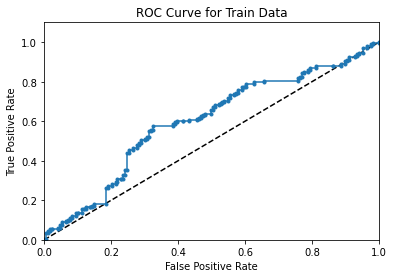

Confusion Matrix for Train Data:
Confusion Matrix for Test Data:
----------------  ----------------  -------------------
                  Predicted Benign  Predicted Malignant
Actual Benign     285               0
Actual Malignant  169               0
----------------  ----------------  -------------------
TEST DATA EVALUATION:
Average Test Accuracy: 0.003
Average Test Precision: 0.018
Average Test Recall: 0.004
Average Test F-Score: 0.006
Average Test AUC: 0.02


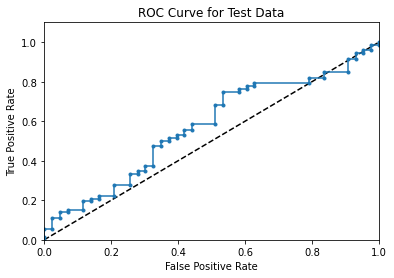

Confusion Matrix for Test Data:
Confusion Matrix for Test Data:
----------------  ----------------  -------------------
                  Predicted Benign  Predicted Malignant
Actual Benign     72                0
Actual Malignant  43                0
----------------  ----------------  -------------------


In [21]:
N = 30
data = df
for m in range(0, N):
    X_train, X_test, y_train, y_test = split_data(data)

    spectralClusterTestMData[m] = X_test

    spectralModel = SpectralClustering(n_clusters=2, gamma=1.0, eigen_tol=1.0, assign_labels='discretize')
    labels = spectralModel.fit_predict(X_train)

    clusterCentroid = getCentroid(labels, X_train)
    spectralClusterMCentroids[m] = clusterCentroid

    spectralClusterTrainDist = euclidean_distances(X_train, clusterCentroid)
    
    firstMCnt,firstBCnt,secondMCnt,secondBCnt = get_class_samples(labels)
    firstLabel, secondLabel = Cluster_Labelling(firstMCnt, firstBCnt, secondMCnt, secondBCnt)        
    spectralClusterLabels = []
    spectralClusterLabels.append(firstLabel)
    spectralClusterLabels.append(secondLabel)
    spectralClusterMLabels[m] = spectralClusterLabels
    
    # Calculating TP, TN, FN and FP
    spectralTrainTP,spectralTrainTN,spectralTrainFP,spectralTrainFN=get_pos_neg_stats(X_train,y_train,[labels,firstLabel,secondLabel])
                                       
spectralTrainAccuracy = round(((spectralTrainTP+spectralTrainTN)/len(X_train)), 3)
spectralTrainPrecision = round(((spectralTrainTP)/(spectralTrainTP+spectralTrainFP)), 3)
spectralTrainRecall = round(((spectralTrainTP)/(spectralTrainTP+spectralTrainFN)), 3)
spectralTrainFScore = round(((2*spectralTrainPrecision*spectralTrainRecall)/(spectralTrainPrecision+spectralTrainRecall)), 3)

spectralTrainActualClass  = np.array(y_train['diagnosis'])
spectralTrainPredProb = []

for i in range(0, len(spectralClusterTrainDist)):
    firstClusterDist = spectralClusterTrainDist[i][0]
    secondClusterDist = spectralClusterTrainDist[i][1]
    if firstLabel=='B':
        spectralTrainPredProb.append(-1*firstClusterDist)
    else:
        spectralTrainPredProb.append(-1*secondClusterDist)

spectralTrainFPR, spectralTrainTPR, _ = roc_curve(spectralTrainActualClass, spectralTrainPredProb, pos_label='B')

spectralTrainAUC = auc(spectralTrainFPR, spectralTrainTPR)
spectralTrainAUC = round(spectralTrainAUC, 3)

spectralAvgTrainAccuracy =spectralAvgTrainAccuracy + spectralTrainAccuracy
spectralAvgTrainPrecision = spectralAvgTrainPrecision + spectralTrainPrecision
spectralAvgTrainRecall = spectralAvgTrainRecall + spectralTrainRecall
spectralAvgTrainFScore =spectralAvgTrainFScore + spectralTrainFScore
spectralAvgTrainAUC = spectralAvgTrainAUC + spectralTrainAUC


spectralAvgTrainAccuracy = round((spectralAvgTrainAccuracy/N), 3)
spectralAvgTrainPrecision = round((spectralAvgTrainPrecision/N), 3)
spectralAvgTrainRecall = round((spectralAvgTrainRecall/N), 3)
spectralAvgTrainFScore = round((spectralAvgTrainFScore/N), 3)
spectralAvgTrainAUC = round((spectralAvgTrainAUC/N), 3)



print('TRAIN DATA EVALUATION:')
print('Average Train Accuracy:', spectralAvgTrainAccuracy)
print('Average Train Precision:', spectralAvgTrainPrecision)
print('Average Train Recall:', spectralAvgTrainRecall)
print('Average Train F-Score:', spectralAvgTrainFScore)
print('Average Train AUC:', spectralAvgTrainAUC)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(spectralTrainFPR, spectralTrainTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Train Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print('Confusion Matrix for Train Data:')

print('Confusion Matrix for Test Data:')
table = [["","Predicted Benign","Predicted Malignant"],["Actual Benign",spectralTrainTP,spectralTrainFN],
        ["Actual Malignant",spectralTrainFP,spectralTrainTN]]
print(tabulate(table))

for m in range(0, N):
    testMData = spectralClusterTestMData[m]
    spectralClusterTestDist = euclidean_distances(X_test, spectralClusterMCentroids[m])

    spectralClusterLabels = spectralClusterMLabels[m]
    spectralFirstLabel = spectralClusterLabels[0]
    spectralSecondLabel = spectralClusterLabels[1]

    spectralTestTP = 0
    spectralTestTN = 0
    spectralTestFP = 0
    spectralTestFN = 0
    for i in range(0, len(spectralClusterTestDist)):
        spectralFirstClusterDict = spectralClusterTestDist[i][0]
        spectralSecondClusterDist = spectralClusterTestDist[i][1]
        if spectralFirstClusterDict<spectralSecondClusterDist:
            if y_test['diagnosis'][i]=='B':
                if spectralFirstLabel=='B':
                    spectralTestTP = spectralTestTP + 1
                else:
                    spectralTestFN=spectralTestFN + 1
            else:
                if spectralFirstLabel=='M':
                    spectralTestTN= spectralTestTN+ 1
                else:
                    spectralTestFP = spectralTestFP + 1
        else:
            if y_test['diagnosis'][i]=='B':
                if spectralSecondLabel=='B':
                    spectralTestTP= spectralTestTP + 1
                else:
                    spectralTestFN = spectralTestFN +1
            else:
                if spectralSecondLabel=='M':
                    spectralTestTN =spectralTestTN +1
                else:
                    spectralTestFP= spectralTestFP + 1

spectralTestAccuracy = round((spectralTestTP+spectralTestTN)/len(X_train),3)
spectralTestPrecision = round((spectralTestTP)/(spectralTestTP+spectralTestFP),3)
spectralTestRecall = round((spectralTestTP)/(spectralTestTP+spectralTestFN),3)
spectralTestFScore = round((2*spectralTestPrecision*spectralTestRecall)/(spectralTestPrecision+spectralTestRecall),3)


spectralTestActualClass  = np.array(y_test['diagnosis'])
spectralTestPredProb = []
for i in range(0, len(spectralClusterTestDist)):
    firstClusterDist = spectralClusterTestDist[i][0]
    secondClusterDist = spectralClusterTestDist[i][1]
    if spectralFirstLabel=='B':
        spectralTestPredProb.append(-1*firstClusterDist)
    else:
        spectralTestPredProb.append(-1*secondClusterDist)

spectralTestFPR, spectralTestTPR, _ = roc_curve(spectralTestActualClass, spectralTestPredProb, pos_label='B')

spectralTestAUC = auc(spectralTestFPR, spectralTestTPR)
spectralTestAUC = round(spectralTestAUC, 3)

spectralAvgTestAccuracy = spectralAvgTestAccuracy + spectralTestAccuracy
spectralAvgTestPrecision =spectralAvgTestPrecision + spectralTestPrecision
spectralAvgTestRecall =spectralAvgTestRecall + spectralTestRecall
spectralAvgTestFScore =spectralAvgTestFScore + spectralTestFScore
spectralAvgTestAUC = spectralAvgTestAUC + spectralTestAUC


spectralAvgTestAccuracy = round((spectralAvgTestAccuracy/N), 3)
spectralAvgTestPrecision = round((spectralAvgTestPrecision/N), 3)
spectralAvgTestRecall = round((spectralAvgTestRecall/N), 3)
spectralAvgTestFScore = round((spectralAvgTestFScore/N), 3)
spectralAvgTestAUC = round((spectralAvgTestAUC/N), 3)

print('TEST DATA EVALUATION:')
print('Average Test Accuracy:', spectralAvgTestAccuracy)
print('Average Test Precision:', spectralAvgTestPrecision)
print('Average Test Recall:', spectralAvgTestRecall)
print('Average Test F-Score:', spectralAvgTestFScore)
print('Average Test AUC:', spectralAvgTestAUC)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(clusterTestFPR, clusterTestTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Test Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print('Confusion Matrix for Test Data:')



print('Confusion Matrix for Test Data:')
table = [["","Predicted Benign","Predicted Malignant"],["Actual Benign",clusterTestTP,clusterTestFN],
        ["Actual Malignant",clusterTestFP,clusterTestTN]]
print(tabulate(table))



**v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.**

### Comparison of the results obtained

In [22]:
def average_measures(lst):
    return sum(lst) / len(lst)

In [23]:

table = [
    ["","Supervised Learning","Semi-Supervised Learning","Unsupervised Learning"],
    ["Average Train Accuracy",average_measures(train_results['accuracy']),average_measures(train_dictionary_measures['accuracy']),avg_train_accu_clstr],
    ["Average Test Accuracy",average_measures(test_results['accuracy']),average_measures(test_dictionary_measures['accuracy']),avg_test_accu_clstr],
    ["Average Train Precision",average_measures(train_results['precision']),average_measures(train_dictionary_measures['precision']),avg_train_precision_clstr],
    ["Average Test Precision",average_measures(test_results['precision']),average_measures(test_dictionary_measures['precision']),avg_test_precision_clstr],
    ["Average Train Recall",average_measures(train_results['recall']),average_measures(train_dictionary_measures['recall']),avg_train_recall_clstr],
    ["Average Test Recall",average_measures(test_results['recall']), average_measures(test_dictionary_measures['recall']),avg_test_recall_clstr],
    ["Average Train F-Score",average_measures(train_results['f1-score']),average_measures(train_dictionary_measures['f1-score']),avg_train_fscore_clstr],
    ["Average Test F-Score",average_measures(test_results['f1-score']),average_measures(test_dictionary_measures['f1-score']),avg_test_fscore_clstr],
    ["Average Train AUC",average_measures(train_results['auc']),average_measures(train_dictionary_measures['auc']),avg_train_auc_clstr],
    ["Average Test AUC",average_measures(test_results['auc']),average_measures(test_dictionary_measures['auc']),avg_test_auc_clstr]]
print(tabulate(table))


-----------------------  -------------------  ------------------------  ---------------------
                         Supervised Learning  Semi-Supervised Learning  Unsupervised Learning
Average Train Accuracy   0.9152716593245227   0.9225403817914832        0.628
Average Test Accuracy    0.897391304347826    0.9043478260869565        0.021
Average Train Precision  0.9228254530843946   0.9292024123085468        0.628
Average Test Precision   0.9052040038338891   0.911654104771567         0.021
Average Train Recall     0.9152716593245227   0.9225403817914832        1.0
Average Test Recall      0.897391304347826    0.9043478260869565        0.033
Average Train F-Score    0.9127856874353645   0.920419006017791         0.771
Average Test F-Score     0.8939807543604824   0.901416563109981         0.026
Average Train AUC        0.9914439946018893   0.9930585833419843        0.568
Average Test AUC         0.9760012919896643   0.9738587424633938        0.019
-----------------------  ---------

# Active Learning Using Support Vector Machines

**(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.**

In [24]:
cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df_b = pd.read_csv('../data/data_banknote_authentication.csv',header= None)
df_b.columns = cols
df_b.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [25]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [26]:
472/1372

0.34402332361516036

In [27]:
X_train,X_test,y_train,y_test = train_test_split(df_b[list(df_b.columns)[:-1]],df_b['class'],test_size = 0.344, random_state = 24)

In [28]:
len(X_test)

472

**(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.**


**i. Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.**

In [29]:
def Passive(X_train, y_train, X_test, y_test):
    
    selection = np.arange(X_train.shape[0])
    indexes_chosen = []
    list_of_accuracy_p = []
    while len(selection)>0:
        select = np.random.choice(selection, 10, replace=False)
        indexes_chosen.extend(select) 
        selection = [x for x in selection if x not in indexes_chosen]
        
        new_X_train, new_y_train = X_train.iloc[indexes_chosen], y_train.iloc[indexes_chosen]     
        grid_cv.fit(new_X_train, new_y_train)
        y_pred = grid_cv.predict(X_test)
        test_report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = test_report['accuracy']
        list_of_accuracy_p.append(accuracy)
    return list_of_accuracy_p

In [30]:
combined_list_passive = []
for i in range(1,51):
    
    X_train,X_test,y_train,y_test = train_test_split(df_b[list(df_b.columns)[:-1]],df_b['class'],test_size = 0.344, random_state = 24)
    #defining the model
    parameters = {'C': np.logspace(-2, 8, num=11)}
    crossvald_kfold = StratifiedKFold(5, random_state=1, shuffle=True)
    grid_cv = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), param_grid = parameters,
                           cv=crossvald_kfold, scoring='f1_weighted')
    
    list_of_accuracy_p = Passive(X_train, y_train, X_test, y_test)
    print('Attempt '+str(i)+':\n')
    print('Test accuracy of model trained with 10 samples taken from train set:',list_of_accuracy_p[0])
    print('Test accuracy of model trained with all 900 samples taken from train set',list_of_accuracy_p[-1],'\n')
    combined_list_passive.append(list_of_accuracy_p)

combined_list_passive = np.array(combined_list_passive)
combined_list_passive = np.mean(combined_list_passive, axis=0)

Attempt 1:

Test accuracy of model trained with 10 samples taken from train set: 0.8559322033898306
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 2:

Test accuracy of model trained with 10 samples taken from train set: 0.8707627118644068
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 3:

Test accuracy of model trained with 10 samples taken from train set: 0.8559322033898306
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 4:

Test accuracy of model trained with 10 samples taken from train set: 0.6398305084745762
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 5:

Test accuracy of model trained with 10 samples taken from train set: 0.7478813559322034
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 6:

Test accuracy of m

**(ii) Train a SVM with a pool of 10 randomly selected datapoints from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.**

In [31]:
def Active(X_train, y_train, X_test, y_test):
    
    selection = np.arange(X_train.shape[0])
    indexes_chosen = []
    list_of_accuracy_a = []

    np.random.shuffle(selection)
    select, selection = selection[:10], selection[10:]
    indexes_chosen.extend(select)
    
    while len(selection)>=0:
        new_X_train, new_y_train = X_train.iloc[indexes_chosen], y_train.iloc[indexes_chosen]
        
        grid_cv.fit(new_X_train, new_y_train)
        
        y_pred = grid_cv.predict(X_test)
        test_report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = test_report['accuracy']
        list_of_accuracy_a.append(accuracy)
        
        if len(selection) == 0:
            break
        distance = grid_cv.decision_function(X_train.iloc[selection])
        sorted_dist = np.arange(len(selection))
        sorted(sorted_dist, key=lambda i : abs(distance[i]))
        selection = selection[sorted_dist]
        select, selection = selection[:10], selection[10:]
        indexes_chosen.extend(select)
        
    return list_of_accuracy_a


In [32]:
combined_list_active = []
for i in range(1,51):
    # random train and test split for every iteration
    X_train,X_test,y_train,y_test = train_test_split(df_b[list(df_b.columns)[:-1]],df_b['class'],test_size = 0.344, random_state = 24)    
    
    #defining the model
    parameters = {'C': np.logspace(-2, 8, num=11)}
    crossvald_kfold = StratifiedKFold(5, random_state=1, shuffle=True)
    grid_cv = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), param_grid = parameters,
                           cv=crossvald_kfold, scoring='f1_weighted')
    
    list_of_accuracy_a = Active(X_train, y_train, X_test, y_test)
    print('Attempt '+str(i)+':\n')
    print('Test accuracy of model trained with 10 samples taken from train set:', list_of_accuracy_a[0])
    print('Test accuracy of model trained with all 900 samples taken from train set', list_of_accuracy_a[-1],'\n')
    combined_list_active.append(list_of_accuracy_a)

combined_list_active = np.array(combined_list_active)
combined_list_active = np.mean(combined_list_active, axis=0)

Attempt 1:

Test accuracy of model trained with 10 samples taken from train set: 0.6398305084745762
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 2:

Test accuracy of model trained with 10 samples taken from train set: 0.7097457627118644
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 3:

Test accuracy of model trained with 10 samples taken from train set: 0.8940677966101694
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 4:

Test accuracy of model trained with 10 samples taken from train set: 0.6546610169491526
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 5:

Test accuracy of model trained with 10 samples taken from train set: 0.8771186440677966
Test accuracy of model trained with all 900 samples taken from train set 0.9915254237288136 

Attempt 6:

Test accuracy of m

**(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.**

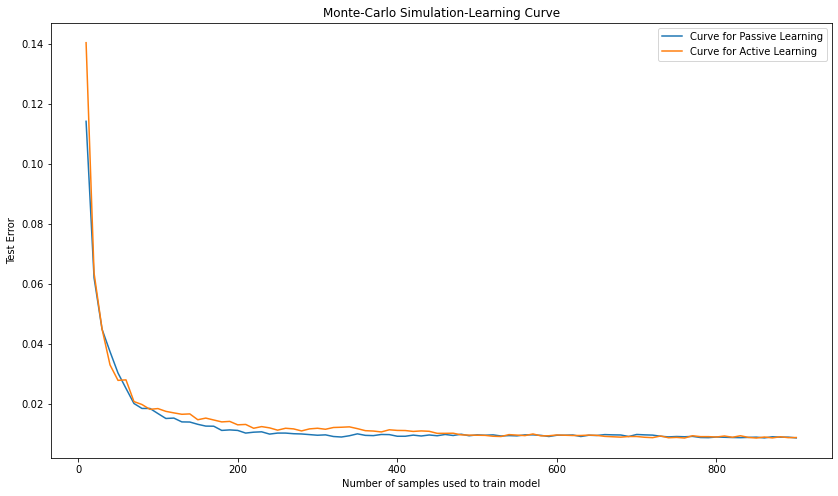

In [33]:
li = np.arange(10, 901, 10)
list_of_error_p = 1 - combined_list_passive
list_of_error_a = 1 - combined_list_active
fig, axes = plt.subplots(figsize=(14, 8))
axes.plot(li,list_of_error_p, label='Curve for Passive Learning')
axes.plot(li,list_of_error_a, label='Curve for Active Learning')
axes.set_xlabel("Number of samples used to train model")
axes.set_ylabel("Test Error")
axes.legend()
axes.set_title("Monte-Carlo Simulation-Learning Curve")
plt.show()

**References:**

https://www.analyticsvidhya.com/blog/2021/08/python-tutorial-working-with-csv-file-for-data-science/

